In [13]:
import pandas as pd
from google.colab import files
data = files.upload()

Saving position_salaries.csv to position_salaries.csv


In [14]:
data = pd.read_csv("position_salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [17]:
#iloc takes the values from the specified index locations and stores them in the assigned variable as an array
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2:3].values

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

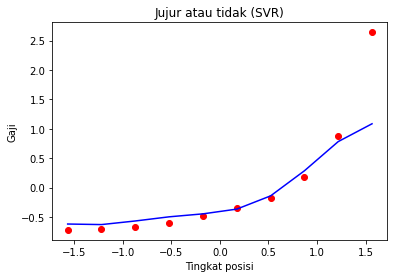

In [20]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [21]:
#Prediksi hasil
#y_pred = regressor.predict(6.5)
#y_pred = regressor.predict(sc_X.transform(6.5))
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

#y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
#y_pred = regressor.predict(6.5)
y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred) 
y_pred

array([[170370.0204065]])

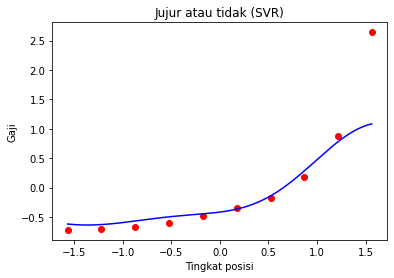

In [22]:
#Visualisasi hasi SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01) # Pilih 0.01 dan bukan 0.1, karena datanya sudah melalui feature scaling
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [23]:
#DECISION TREE REGRESSION
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [25]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [28]:
y_pred = regressor.predict(X_test.reshape(-1,1))

# y_pred = regressor.predict([[12]])
# y_pred

In [29]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,500.065779,535.866729
1,538.179684,530.748225
2,656.636523,651.486741
3,609.417479,646.266946
4,405.915159,415.817674
5,55.390338,32.546619
6,733.215828,737.800824
7,476.794525,444.826802
8,450.708589,454.189267
9,697.833986,746.946389


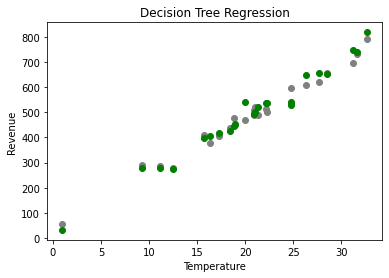

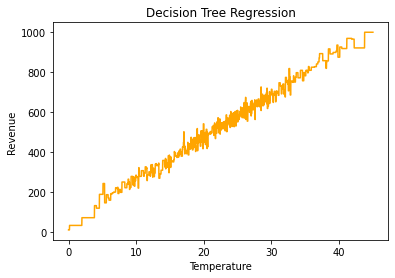

In [30]:
#Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'grey')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [31]:
# RANDOM FOREST REGRESSION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

dataset

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [34]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
y_pred = regressor.predict(X_test.reshape(-1,1))

# y_pred = regressor.predict([[10]])
# y_pred

In [36]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,643.944327,659.145757
1,594.311675,568.968195
2,472.549343,433.304256
3,575.176896,566.793979
4,377.430928,365.295669
5,689.930778,704.100682
6,499.458343,497.826820
7,436.951311,432.885754
8,396.935648,399.869015
9,583.855231,566.080727


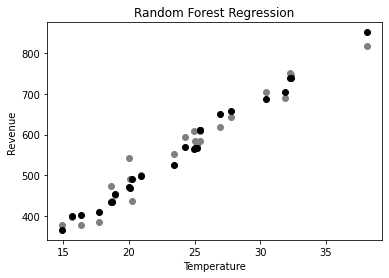

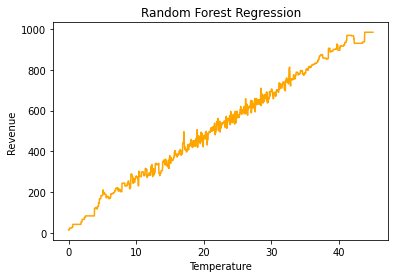

In [37]:
#Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'grey')
plt.scatter(X_test, y_pred, color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [38]:
#latihan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/FuelConsumptionCo2.csv'
cdf = pd.read_csv(url)

cdf.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [39]:
cdf.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
cdf.dtypes
cdf = cdf.select_dtypes(include = ['int64', 'float64'])
cdf = cdf.fillna(cdf.mean())
cdf

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


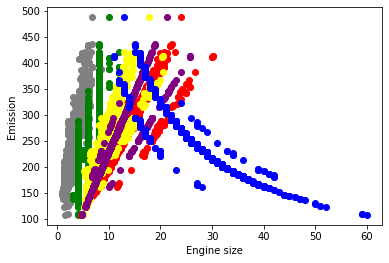

In [41]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='grey')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='red')
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color='yellow')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='purple')
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.CO2EMISSIONS, color='blue')
# plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# get the "engine size" as the independent variable (regressor)
X = cdf.drop('CO2EMISSIONS', axis=1)

# get the "emission" as the dependent variable
y = cdf['CO2EMISSIONS']

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

      MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0          2014         2.0          4                   9.9   
1          2014         2.4          4                  11.2   
2          2014         1.5          4                   6.0   
3          2014         3.5          6                  12.7   
4          2014         3.5          6                  12.1   
...         ...         ...        ...                   ...   
1062       2014         3.0          6                  13.4   
1063       2014         3.2          6                  13.2   
1064       2014         3.0          6                  13.4   
1065       2014         3.2          6                  12.9   
1066       2014         3.2          6                  14.9   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                     6.7                   8.5                        33  
1                     7.7                   9.6                        29  
2  

In [43]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

RandomForestRegressor()

In [45]:
# Predicting a new result
# y_pred = regressor.predict([[2014,1.3,6,10.0,8.6,4.9,90]])
y_pred = regressor.predict(X_test)
# y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([355.79      , 209.        , 230.02      , 212.31      ,
       171.88      , 292.        , 212.        , 276.46      ,
       202.        , 334.7       , 312.74      , 437.41      ,
       220.58      , 280.95      , 177.29583333, 259.98      ,
       409.09      , 223.02      , 254.91      , 359.37      ,
       191.02      , 190.46      , 244.        , 238.99      ,
       129.77      , 283.04      , 274.        , 294.        ,
       246.        , 110.66      , 358.95      , 236.85      ,
       228.82      , 237.78      , 191.02      , 196.        ,
       294.        , 221.04      , 232.05      , 237.03      ,
       184.35      , 183.96      , 201.95      , 185.31      ,
       297.02      , 198.        , 259.92      , 179.        ,
       344.        , 359.02      , 338.05      , 287.4       ,
       290.        , 128.49      , 230.        , 179.        ,
       282.58      , 159.29      , 258.        , 209.        ,
       207.03      , 204.97      , 225.03      , 294.  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


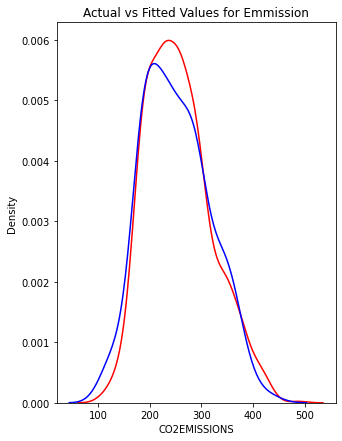

In [46]:
# Visualising the Random Forest Regression results (higher resolution) with scaling value
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Emmission')

plt.show()
plt.close()